In [2]:
#importandoa as biblioetcas usadas para a preparação dos dados e predição
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importando o csv
df = pd.read_csv("nba.games.stats.csv")

In [4]:
df.columns
df.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [5]:
df.drop(['Unnamed: 0', 'Team', 'Game', 'Date', 'Home', 'Opponent'], axis=1, inplace=True)
df.head()
df.info

<bound method DataFrame.info of      WINorLOSS  TeamPoints  OpponentPoints  FieldGoals  FieldGoalsAttempted  \
0            L         102             109          40                   80   
1            W         102              92          35                   69   
2            L          92              94          38                   92   
3            L         119             122          43                   93   
4            W         103              96          33                   81   
...        ...         ...             ...         ...                  ...   
9835         L         104             120          38                   72   
9836         L         115             119          47                   94   
9837         L          97             103          35                   87   
9838         W         113             101          41                   83   
9839         L          92             101          33                   95   

      FieldGoals.  

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['WINorLOSS'] = pd.get_dummies(df['WINorLOSS'])

In [7]:
#importando o algoritmo de vou uzar para a prediçao e inicializando
from sklearn.linear_model import LogisticRegression

In [8]:
#importando para separar dos dados de teste e de treino
from sklearn.model_selection import train_test_split

In [9]:
#separando a base de dados
x = df.drop('WINorLOSS',axis=1)
x = x.fillna(x.mean())
y = df['WINorLOSS']
y = y.fillna(y.mean())

In [10]:
#separando os dados de treino de teste sendo 40% para teste e 60% para treino e escolhedo o um random 
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state=101)
aux = y_teste.reset_index()
aux.drop('index',axis=1,inplace=True)

In [11]:
logModel = LogisticRegression()

In [12]:
#treinando o algorlitmo
logModel.fit(x_treino,y_treino)

/home/marcos/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
#fazendo a prediçao
predicao = logModel.predict(x_teste)

Text(0, 0.5, 'Y valor predito')

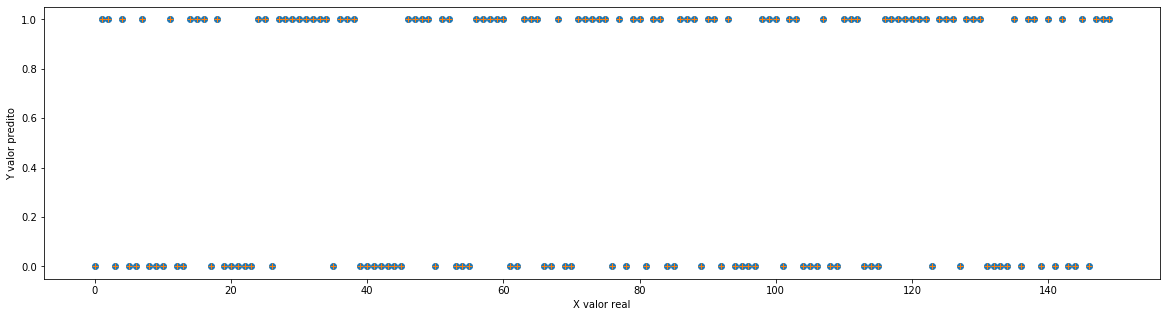

In [14]:
plt.figure(figsize=(20,5))
plt.plot(aux[:150], 'o')
plt.plot(predicao[:150], '+')
plt.xlabel('X valor real')
plt.ylabel('Y valor predito')

In [15]:
from sklearn import metrics
#MAE é o mais fácil de entender, porque é o erro médio.
#MSE é mais popular que o MAE, porque a MSE "puniria" erros maiores, o que tende a ser útil no mundo real.
#RMSE é ainda mais popular do que MSE, porque o RMSE é interpretável nas unidades "y".
print('MAE:', metrics.mean_absolute_error(y_teste, predicao))
print('MSE:', metrics.mean_squared_error(y_teste, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predicao)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [16]:
print('Variance score: %.2f' % logModel.score(x_teste,aux))

Variance score: 1.00


In [17]:
#fazendo a predicao usando cross-valodation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logModel,x,y, cv=10)

/home/marcos/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/marcos/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/marcos/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/marcos/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/marcos/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

In [18]:
print('Variance Cros-Validation rscore: %.2f' % max(scores))

Variance Cros-Validation rscore: 1.00


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_teste,predicao))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1476
           1       1.00      1.00      1.00      1476

    accuracy                           1.00      2952
   macro avg       1.00      1.00      1.00      2952
weighted avg       1.00      1.00      1.00      2952



In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_teste,predicao))

[[1476    0]
 [   0 1476]]


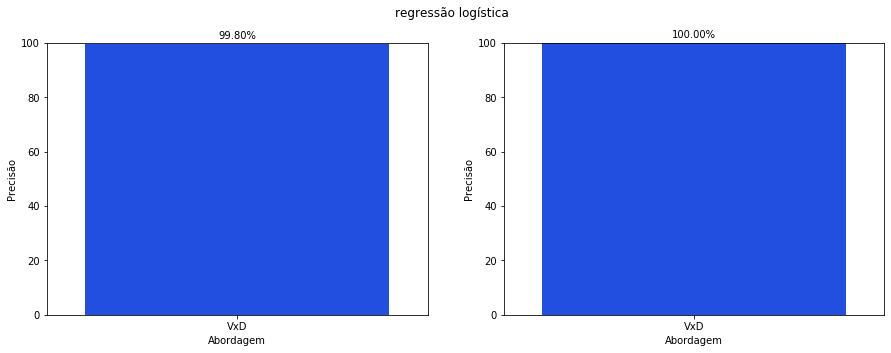

In [25]:
plt.figure(figsize=(15,5))
plt.suptitle('regressão logística')

plt.subplot(1, 2, 1)
plt.title("Base 1")

graph = sns.barplot(x=['VxD'], y=[99.8],palette='bright')
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.title("Base 2")
graph2 = sns.barplot(x=['VxD'], y=[100],palette='bright')
for p in graph2.patches:
    graph2.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])
plt.savefig('img/regressaologistocaAPI.png')